<a href="https://colab.research.google.com/github/ChoeTaeBin/Machine-Learnig/blob/main/LSTM%26GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기본적인 simple rnn을 사용하면 시퀀스가 길어짐에따라 은닉상태에 담긴 정보가 희석되어 멀리 떨어진 토큰의 중요한 정보가 잘 반영되지 않을 수 있다. 이런 문제를 해결하기 위해서 LSTM과 GRU셸이 발명되었다.

In [2]:
#데이터 준비
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state = 42)
print(train_input.shape, val_input.shape)

(20000,) (5000,)


In [3]:
#길이 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [4]:
#모델 만들기
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100)) #임베딩 층
model.add(keras.layers.LSTM(8,dropout=0.3, return_sequences = True)) #연결하려면 모든 은닉상태를 출력 해야함
model.add(keras.layers.LSTM(8,dropout = 0.3))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 100, 8)            800       
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
#모델 설정
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics = ['accuracy'])

#모델 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 15s 28ms/step - loss: 0.6930 - accuracy: 0.5234 - val_loss: 0.6927 - val_accuracy: 0.5650
Epoch 2/100
  2/313 [..............................] - ETA: 34s - loss: 0.6932 - accuracy: 0.5312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 18ms/step - loss: 0.6922 - accuracy: 0.5702 - val_loss: 0.6914 - val_accuracy: 0.5998
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6889 - accuracy: 0.6123 - val_loss: 0.6846 - val_accuracy: 0.6492
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6710 - accuracy: 0.6542 - val_loss: 0.6473 - val_accuracy: 0.6830
Epoch 5/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6078 - accuracy: 0.6967 - val_loss: 0.5751 - val_accuracy: 0.7190
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5675 - accuracy: 0.7221 - val_loss: 0.5504 - val_accuracy: 0.7350
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5423 - accuracy: 0.7416 - val_loss: 0.5285 - val_accuracy: 0.7508
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5239 - accuracy: 0.7528 - val_loss: 0.5136 - val_accuracy: 0.7582
Epoc

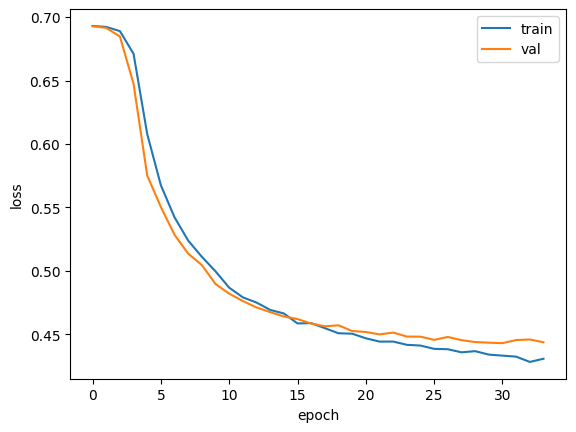

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

GRU는 LSTM을 간소화한 것이다.

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100)) #임베딩 층
model2.add(keras.layers.GRU(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
#모델 설정
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics = ['accuracy'])

#모델 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 18ms/step - loss: 0.6929 - accuracy: 0.5182 - val_loss: 0.6921 - val_accuracy: 0.5312
Epoch 2/100
 24/313 [=>............................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5339

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 9ms/step - loss: 0.6915 - accuracy: 0.5510 - val_loss: 0.6908 - val_accuracy: 0.5658
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6897 - accuracy: 0.5699 - val_loss: 0.6890 - val_accuracy: 0.5748
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6872 - accuracy: 0.5850 - val_loss: 0.6863 - val_accuracy: 0.5848
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6837 - accuracy: 0.5931 - val_loss: 0.6825 - val_accuracy: 0.5928
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6788 - accuracy: 0.6023 - val_loss: 0.6772 - val_accuracy: 0.6006
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6721 - accuracy: 0.6126 - val_loss: 0.6700 - val_accuracy: 0.6088
Epoch 8/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6628 - accuracy: 0.6234 - val_loss: 0.6601 - val_accuracy: 0.6220
Epoch 9/

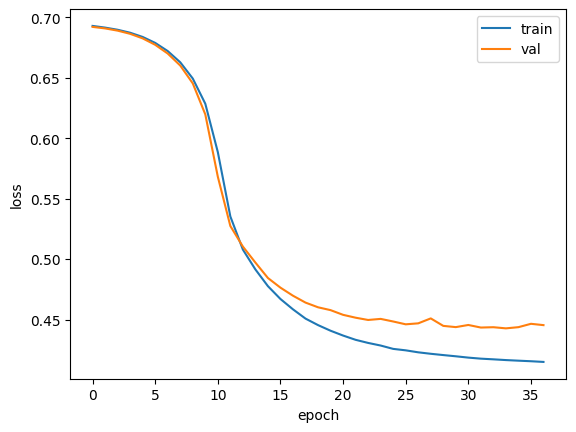

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
#최종평가
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 6ms/step - loss: 0.4378 - accuracy: 0.7936


[0.43779629468917847, 0.7935600280761719]